In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

# Setting display options for pandas
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
# Loading the dataset
houses_data = pd.read_csv('houses_Madrid.csv')

In [4]:
# Displaying information about the dataset
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

<h3>Data Dictionary</h3>

<table>
    <thead>
        <tr>
            <th>Variable Name</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>ID</td>
            <td>Identifier ID</td>
        </tr>
        <tr>
            <td>title</td>
            <td>Title from listing</td>
        </tr>
        <tr>
            <td>subtitle</td>
            <td>Neighborhood and city</td>
        </tr>
        <tr>
            <td>sq_mt_built</td>
            <td>Square meter built</td>
        </tr>
        <tr>
            <td>sq_mt_useful</td>
            <td>Square meter useful</td>
        </tr>
        <tr>
            <td>n_rooms</td>
            <td>Number of rooms</td>
        </tr>
        <tr>
            <td>n_bathrooms</td>
            <td>Number of bathrooms</td>
        </tr>
        <tr>
            <td>sq_mt_allotment</td>
            <td>Square meter allotment</td>
        </tr>
        <tr>
            <td>latitude, longitude</td>
            <td>Latitude, Longitude (Since portals hide the location mainly NAs)</td>
        </tr>
        <tr>
            <td>raw_address</td>
            <td>Address</td>
        </tr>
        <tr>
            <td>is_exact_address_hidden</td>
            <td>Boolean values</td>
        </tr>
        <tr>
            <td>buy_price</td>
            <td>Target Value</td>
        </tr>
    </tbody>
</table>


# Data preprocessing steps:

* Remove columns with NaN values
* Get specific columns for further processing
* Check for duplicated rows


In [7]:
# Removing columns with NaN values
houses_data = houses_data.dropna(axis=1, how='all')

# Displaying information about the dataset after removing NaN columns
houses_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

In [8]:
# Checking for duplicated rows in the dataset
houses_data.duplicated().sum()


0

In [9]:
# Selecting only the necessary columns for analysis
selected_columns = ['id', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'rent_price', 'buy_price', 'buy_price_by_area', 'built_year', 'parking_price']
df = houses_data[selected_columns]

# Displaying information about the selected columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   subtitle           21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   sq_mt_useful       8228 non-null   float64
 4   n_rooms            21742 non-null  int64  
 5   n_bathrooms        21726 non-null  float64
 6   n_floors           1437 non-null   float64
 7   sq_mt_allotment    1432 non-null   float64
 8   rent_price         21742 non-null  int64  
 9   buy_price          21742 non-null  int64  
 10  buy_price_by_area  21742 non-null  int64  
 11  built_year         10000 non-null  float64
 12  parking_price      7719 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.2+ MB


### Data preprocessing plan:

* Rename the 'subtitle' column to 'city' and 'raw_address' to 'address'
* Determine the approach for handling NaN values


In [10]:
# Renaming the 'subtitle' column to 'city'
df = df.rename(columns={'subtitle': 'city'})

In [11]:
# Selecting columns with relatively fewer NaN values for analysis
selected_columns = ['id', 'city', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'rent_price', 'buy_price', 'buy_price_by_area']
df = df[selected_columns]

# Displaying information about the selected columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   city               21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21726 non-null  float64
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [12]:
# Descriptive statistics for the 'n_rooms' column
df.n_rooms.describe()


count   21,742.00
mean         3.01
std          1.51
min          0.00
25%          2.00
50%          3.00
75%          4.00
max         24.00
Name: n_rooms, dtype: float64

In [13]:
# Removing rows with 0 rooms
df.drop(df.index[df.n_rooms == 0], axis=0, inplace=True)

In [17]:
# Filling NaN values in the 'n_bathrooms' column with the mode
df['n_bathrooms'].fillna(df['n_bathrooms'].mode()[0], inplace=True)

In [15]:
df.sample(10)

,id,city,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
15872,5870,"Puerta Bonita, Madrid",63.00,2,1.00,629,120890,1919
9845,11897,"Hortaleza, Madrid",573.00,5,6.00,-14150,1800000,3141
7740,14002,"Valdemarín, Madrid",360.00,3,3.00,-7993,1675000,4653
19132,2610,"Barrio de Salamanca, Madrid",231.00,3,4.00,-62773,2280000,9870
13537,8205,"Costillares, Madrid",69.00,2,1.00,1250,320000,4638
16425,5317,"Comillas, Madrid",103.00,3,1.00,982,221000,2146
15165,6577,"Prosperidad, Madrid",94.00,4,2.00,1240,315900,3361
2490,19252,"Almendrales, Madrid",126.00,3,2.00,1423,393000,3119
19071,2671,"Guindalera, Madrid",71.00,1,1.00,1249,319644,4502
4832,16910,"Numancia, Madrid",96.00,3,1.00,884,190000,1979


In [18]:
# Replacing 0 values in 'n_bathrooms' column with 1
df['n_bathrooms'] = df['n_bathrooms'].replace(0, 1)

In [19]:
# Converting the data type of the 'n_bathrooms' column to integer
df['n_bathrooms'] = df['n_bathrooms'].astype(int)

In [21]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21303 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21303 non-null  int64  
 1   city               21303 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21303 non-null  int64  
 4   n_bathrooms        21303 non-null  int32  
 5   rent_price         21303 non-null  int64  
 6   buy_price          21303 non-null  int64  
 7   buy_price_by_area  21303 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 1.4+ MB


In [22]:
# Dropping rows with NaN values in the 'sq_mt_built' column
df.dropna(subset=['sq_mt_built'], inplace=True)

In [23]:
# Displaying updated information about the DataFrame.
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   city               21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int32  
 5   rent_price         21177 non-null  int64  
 6   buy_price          21177 non-null  int64  
 7   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 1.4+ MB


In [25]:
df.sample(10)

,id,city,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
19287,2455,"Fuente del Berro, Madrid",77.00,2,2,1275,330000,4286
12965,8777,"San Pascual, Madrid",240.00,5,4,1536,1250000,5208
16982,4760,"San Isidro, Madrid",107.00,2,2,1327,352000,3290
19220,2522,"Castellana, Madrid",339.00,5,5,-244802,2950000,8702
1815,19927,"Casco Histórico de Vallecas, Madrid",57.00,2,1,634,122000,2140
1799,19943,"Casco Histórico de Vallecas, Madrid",80.00,1,1,795,164000,2050
6119,15623,"Aluche, Madrid",87.00,3,2,910,198000,2276
13674,8068,"Ciudad Lineal, Madrid",78.00,2,1,613,117000,1500
2817,18925,"Tetuán, Madrid",274.00,5,3,2165,1150000,4197
12341,9401,"Gaztambide, Madrid",125.00,4,2,1804,560000,4480


In [28]:
# Changing negative values in the 'rent_price' column to zero
for value in df.rent_price.values:
    if value < 0:
        df.rent_price = 0

In [29]:
# Splitting the 'city' column into 'district' and 'city'
df['district'] = df.city.str.split(',', expand=True)[0]

In [31]:
# Displaying first 5 rows of the DataFrame
df.head()

,id,city,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area,district
0,21742,"San Cristóbal, Madrid",64.00,2,1,471,85000,1328,San Cristóbal
1,21741,"Los Ángeles, Madrid",70.00,3,1,666,129900,1856,Los Ángeles
2,21740,"San Andrés, Madrid",94.00,2,2,722,144247,1535,San Andrés
3,21739,"San Andrés, Madrid",64.00,2,1,583,109900,1717,San Andrés
4,21738,"Los Rosales, Madrid",108.00,2,2,1094,260000,2407,Los Rosales


In [33]:
# Selecting specific columns for further analysis
df = df[['id', 'district', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'rent_price',
         'buy_price', 'buy_price_by_area']]

# Displaying first 5 rows.
df.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
0,21742,San Cristóbal,64.00,2,1,471,85000,1328
1,21741,Los Ángeles,70.00,3,1,666,129900,1856
2,21740,San Andrés,94.00,2,2,722,144247,1535
3,21739,San Andrés,64.00,2,1,583,109900,1717
4,21738,Los Rosales,108.00,2,2,1094,260000,2407


In [35]:
houses_data.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,is_exact_address_hidden,street_name,street_number,floor,is_floor_under,neighborhood_id,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.00,60.00,2,1.00,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,3,False,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,False,85000,1328,True,HouseType 1: Pisos,False,False,"1,960.00",NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.00,NaN,3,1.00,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,4,False,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.00,54.00,2,2.00,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,1,False,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.00,NaN,2,1.00,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,Bajo,True,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,False,109900,1717,True,HouseType 1: Pisos,False,False,"1,955.00",NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,True,NaN,en trámite,False,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.00,90.00,2,2.00,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,4,False,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,False,260000,2407,True,HouseType 1: Pisos,False,False,"2,003.00",NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,True,en trámite,True,True,0.00,True,True,True,True


In [38]:
# Displaying information about specific columns in the 'houses_data' DataFrame
houses_data[['raw_address', 'is_exact_address_hidden', 'street_name']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   raw_address              16277 non-null  object
 1   is_exact_address_hidden  21742 non-null  bool  
 2   street_name              15837 non-null  object
dtypes: bool(1), object(2)
memory usage: 361.1+ KB


In [40]:
# Displaying the unique values in the 'operation' column of the 'houses_data' DataFrame
houses_data.operation.unique()

array(['sale'], dtype=object)

In [41]:
# Displaying the unique values in the 'is_new_development' column of the 'houses_data' DataFrame
houses_data.is_new_development.unique()

array([False, nan, True], dtype=object)

In [42]:
# Displaying the unique values in the 'house_type_id' column of the 'houses_data' DataFrame
houses_data.house_type_id.unique()

array(['HouseType 1: Pisos', 'HouseType 4: Dúplex', nan,
       'HouseType 5: Áticos', 'HouseType 2: Casa o chalet'], dtype=object)

In [44]:
# Displaying information about specific columns
houses_data[['house_type_id', 'is_new_development']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_type_id       21351 non-null  object
 1   is_new_development  20750 non-null  object
dtypes: object(2)
memory usage: 339.8+ KB


In [45]:
# Dropping the 'rent_price' column from the DataFrame
df.drop(columns=['rent_price'], inplace=True)

In [48]:
# Saving the cleaned DataFrame without including the index.
df.to_csv('Madrid_Housing_Cleaned.csv', index=False)

In [49]:
# Loading the cleaned DataFrame from the CSV file.
df = pd.read_csv('Madrid_Housing_Cleaned.csv')

# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21177 entries, 0 to 21176
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   district           21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int64  
 5   buy_price          21177 non-null  int64  
 6   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.1+ MB


### Univariate Analysis

C:\Users\20155\AppData\Local\Temp\ipykernel_31916\367188099.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\20155\AppData\Local\Temp\ipykernel_31916\367188099.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\20155\AppData\Local\Temp\ipykernel_31916\367188099.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\20155\AppData\Local\Temp\ipykernel_31916\367188099.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


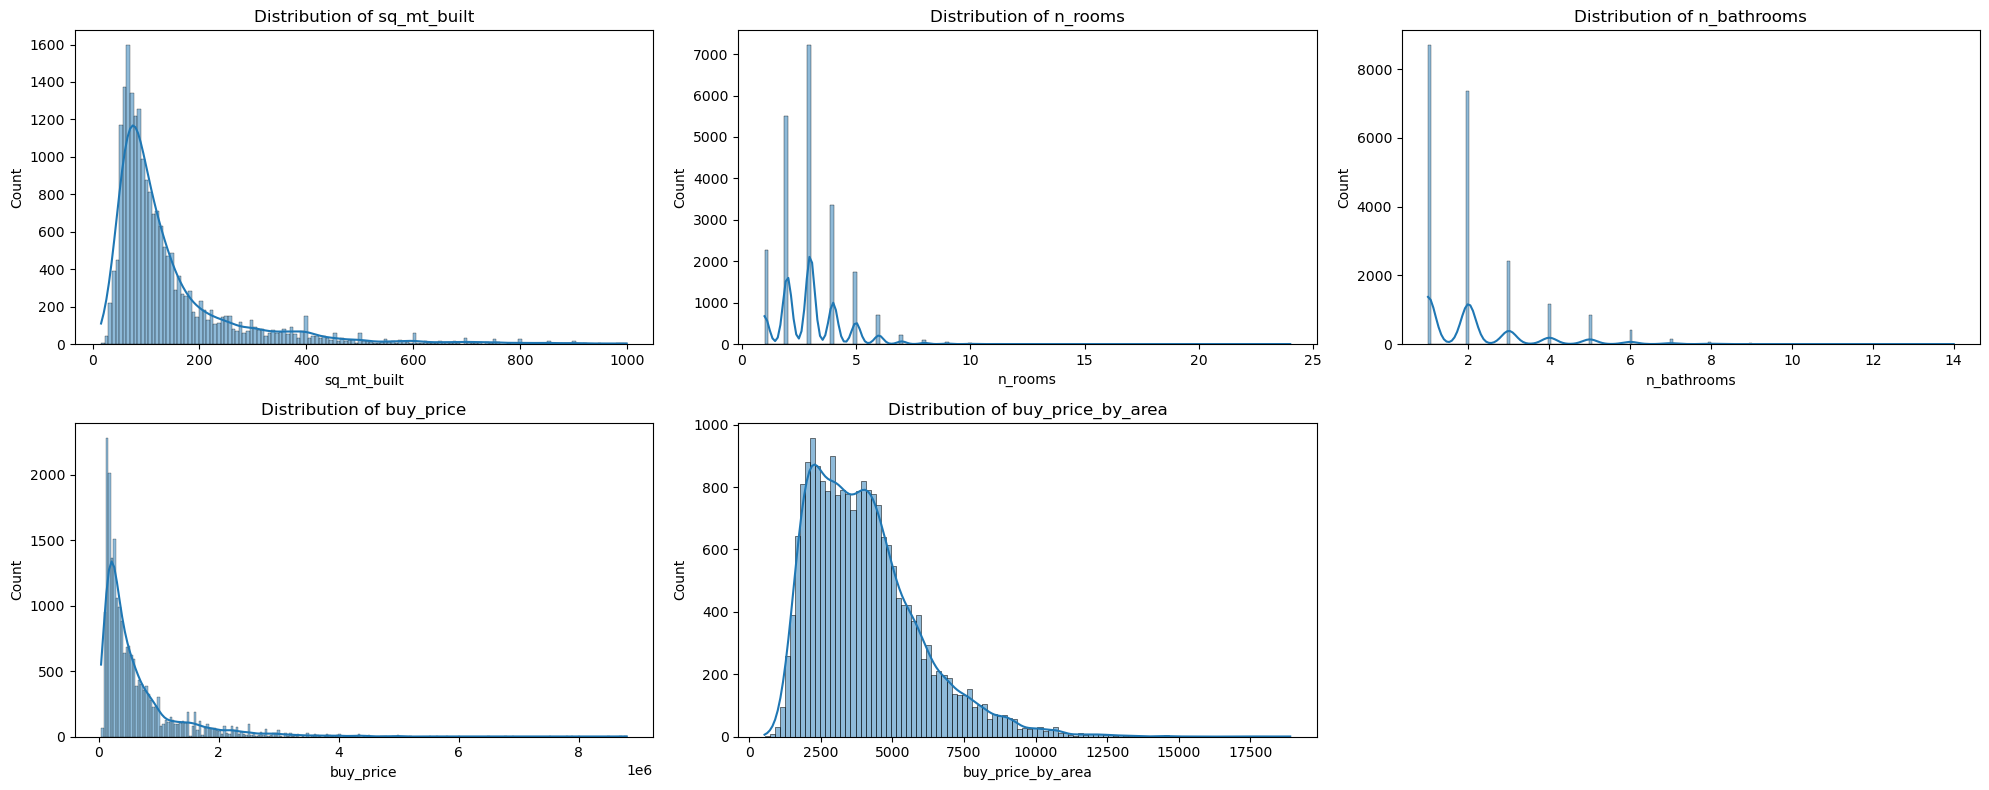

In [52]:
# Analyzing Numerical Columns
# Visualizing the distribution of numerical data

plt.figure(figsize=(20, 8))
for e, i in enumerate(df.columns[2:]):
    plt.subplot(2, 3, e+1)
    sns.histplot(df[i], kde=True)
    plt.title('Distribution of ' + i)
    plt.tight_layout()

C:\Users\20155\AppData\Local\Temp\ipykernel_31916\131443751.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\20155\AppData\Local\Temp\ipykernel_31916\131443751.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\20155\AppData\Local\Temp\ipykernel_31916\131443751.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\20155\AppData\Local\Temp\ipykernel_31916\131443751.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


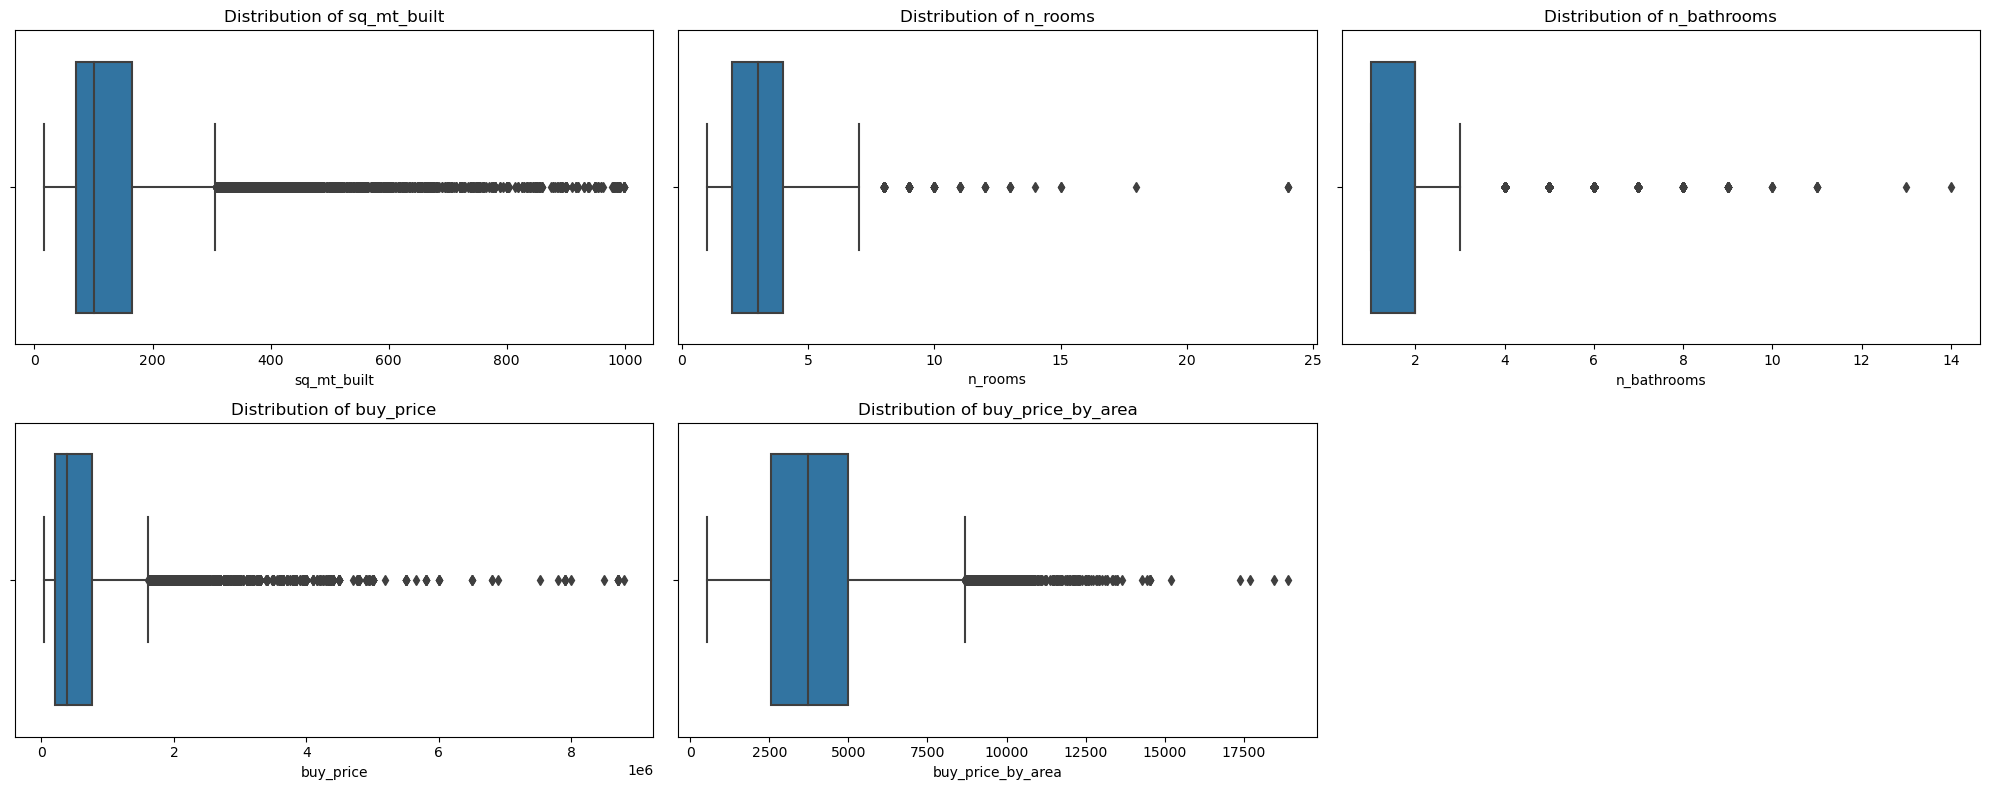

In [53]:
# Visualizing the distribution of numerical columns using boxplots

plt.figure(figsize=(20, 8))
for e, i in enumerate(df.columns[2:]):
    plt.subplot(2, 3, e+1)
    plt.title('Distribution of ' + i)
    sns.boxplot(x=df[i])
    plt.tight_layout()


In [55]:
# Visualizing the distribution of districts in Madrid using a bar plot
px.bar(df.district.value_counts(), title='Distribution of Districts in Madrid')

### Bivariate Analysis

#### Correlation Coeffcient

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\20155\AppData\Local\Temp\ipykernel_31916\1180741492.py:6: UserWarning:

The figure layout has changed to tight



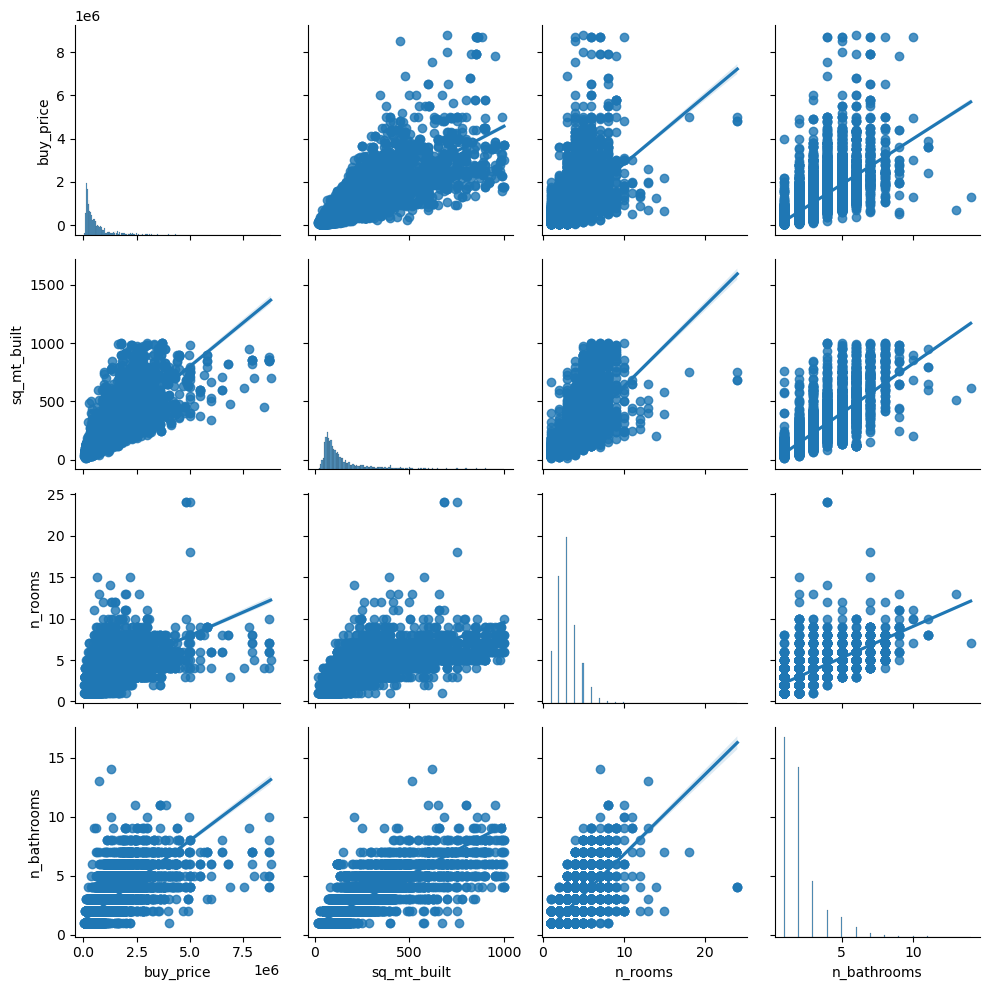

In [58]:
# Selecting columns for correlation analysis
corr = df[['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms']]

# Visualizing pairwise relationships and correlation using scatter plots with regression lines
sns.pairplot(corr, kind='reg')
plt.tight_layout()

Text(0, 0.5, 'Buy Price')

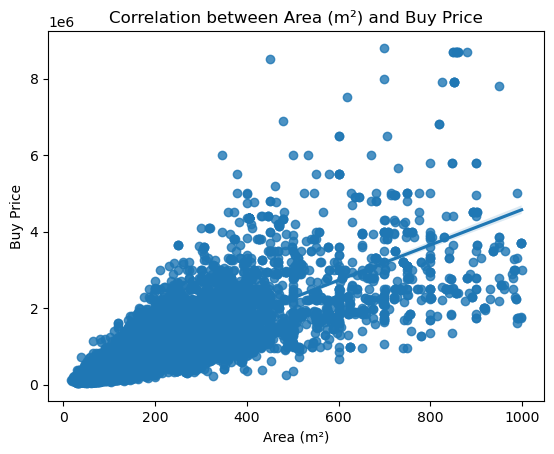

In [59]:
# Visualizing the correlation between area (in square meters) and buy price using a regression plot
sns.regplot(data=df, x='sq_mt_built', y='buy_price')
plt.title("Correlation between Area (m²) and Buy Price")
plt.xlabel('Area (m²)')
plt.ylabel('Buy Price')

Text(0.5, 1.0, 'Correlation Coefficient between Numerical Columns')

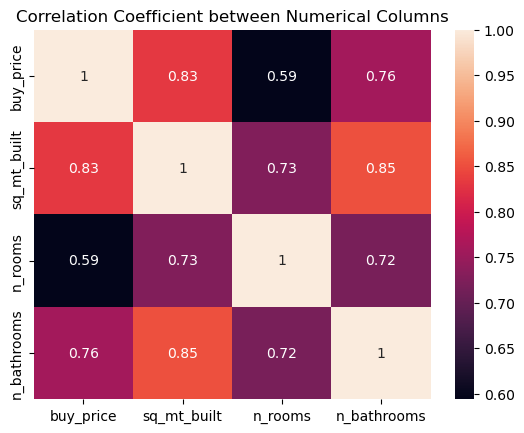

In [60]:
# Visualizing the correlation coefficients between numerical columns using a heatmap
sns.heatmap(corr.corr(), annot=True)
plt.title('Correlation Coefficient between Numerical Columns')

In [61]:
df.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
0,21742,San Cristóbal,64.00,2,1,85000,1328
1,21741,Los Ángeles,70.00,3,1,129900,1856
2,21740,San Andrés,94.00,2,2,144247,1535
3,21739,San Andrés,64.00,2,1,109900,1717
4,21738,Los Rosales,108.00,2,2,260000,2407


# <div style="text-align: center;">Factors Impacting House Prices in Madrid:</div>
# <div style="text-align: center;">Location vs. Size</div>


#### Housing Prices Variation Across Districts: Identifying the Most Expensive Areas for Purchasing a Home

<Axes: title={'center': 'Mean Price by District'}, xlabel='District', ylabel='Price'>

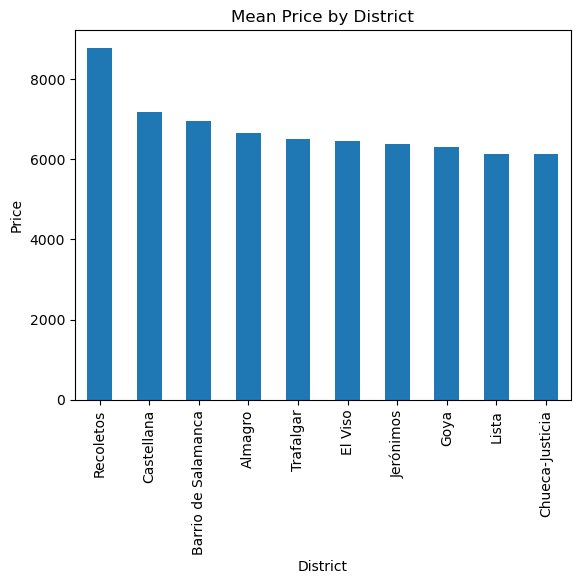

In [65]:
# Calculating the mean price per square meter by district
mean_price = df.groupby('district')['buy_price_by_area'].mean().round(2).sort_values(ascending=False)

# Visualizing the top 10 districts with the highest mean price per square meter
mean_price.head(10).plot(kind='bar', xlabel='District', ylabel='Price', title='Mean Price by District')


In [66]:
# Filtering the DataFrame to include only data from the district of Recoletos
recoletos = df.query('district == "Recoletos"')